- Kaggle: https://www.kaggle.com/uciml/german-credit
- UCI: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

### "default" is the target column
- 1 = Good
- 2 = Bad)

NOTE: It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1)

### Installment_as_income_perc
- what does it mean?
- Why only 4 possible values - 1, 2, 3, 4

https://money.stackexchange.com/questions/35860/what-is-an-installment-rate-percentage

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
df_gerCrd = pd.read_csv("german_credit.csv")

In [3]:
# Check counts of occurance of various values of various columns
df_gerCrd["default"].value_counts()
df_gerCrd["account_check_status"].value_counts()
df_gerCrd["duration_in_month"].value_counts()
df_gerCrd["credit_history"].value_counts()
df_gerCrd["purpose"].value_counts()
df_gerCrd["credit_amount"].value_counts()
df_gerCrd["savings"].value_counts()
df_gerCrd["present_emp_since"].value_counts()
df_gerCrd["installment_as_income_perc"].value_counts()
df_gerCrd["personal_status_sex"].value_counts()
df_gerCrd["other_debtors"].value_counts()
df_gerCrd["present_res_since"].value_counts()
df_gerCrd["property"].value_counts()
df_gerCrd["age"].value_counts()
df_gerCrd["other_installment_plans"].value_counts()
df_gerCrd["housing"].value_counts()
df_gerCrd["credits_this_bank"].value_counts()
df_gerCrd["job"].value_counts()
df_gerCrd["people_under_maintenance"].value_counts()
df_gerCrd["telephone"].value_counts()
df_gerCrd["foreign_worker"].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [4]:
df_gerCrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

<HTML>
    <BODY>
        <font color = "red">No missing values (null values) found in any column.</font>
    </BODY>
</HTML>

In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

print("Input data dimension: ", df_gerCrd.shape)
df_gerCrd.columns

Input data dimension:  (1000, 21)


Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split

X = X = df_gerCrd.drop('default', axis=1)

y = df_gerCrd[['default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [7]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
# Print Shape of model data
print("Training data shape (X_train, y_train): ", X_train.shape, ", ", y_train.shape)

Training data shape (X_train, y_train):  (500, 20) ,  (500, 1)


### Following columns will use dummies (since the values are classes/non-hierarical)
- credit_history
- purpose
- personal_status_sex
- other_debtors
- property
- other_installment_plans
- housing  // ??? Is it better to label it?
- telephone

### Following columns will use labeling encoding (since the values are ordinal/hierarical in nature)
- account_check_status
- savings
- present_emp_since
- job
- foreign_worker

In [9]:
# Define function to apply dummies and label encoding
def apply_d_l(inputX):
    # apply dummies
    out = pd.get_dummies(inputX, columns=["credit_history"])
    out = pd.get_dummies(out, columns=["purpose"])
    out = pd.get_dummies(out, columns=["personal_status_sex"])
    out = pd.get_dummies(out, columns=["other_debtors"])
    out = pd.get_dummies(out, columns=["property"])
    out = pd.get_dummies(out, columns=["other_installment_plans"])
    out = pd.get_dummies(out, columns=["housing"])
    out = pd.get_dummies(out, columns=["telephone"])
    out = pd.get_dummies(out, columns=["foreign_worker"])

    # apply label encoding
    out['account_check_status'] = out['account_check_status'].replace(
        {'no checking account': 0, '< 0 DM': 1, '0 <= ... < 200 DM': 2, 
         '>= 200 DM / salary assignments for at least 1 year': 3})
    out['savings'] = out['savings'].replace({
        '... < 100 DM': 0, 'unknown/ no savings account': 1, '100 <= ... < 500 DM': 2, 
        '500 <= ... < 1000 DM ': 3, '.. >= 1000 DM ': 4})
    out['present_emp_since'] = out['present_emp_since'].replace({
        'unemployed': 0, '... < 1 year ': 1, 
        '1 <= ... < 4 years': 2, '4 <= ... < 7 years': 3, '.. >= 7 years': 4})
    out['job'] = out['job'].replace({
        'unemployed/ unskilled - non-resident': 0, 'unskilled - resident': 1, 
        'skilled employee / official': 2, 'management/ self-employed/ highly qualified employee/ officer': 3})
    
    return out

In [10]:
X_train_d = apply_d_l(X_train)
#X_train.head()
X_train_d.head()

,account_check_status,duration_in_month,credit_amount,savings,present_emp_since,installment_as_income_perc,present_res_since,age,credits_this_bank,job,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
789,1,40,5998,0,2,4,3,27,1,2,...,1,0,0,0,1,0,0,1,0,1
179,1,21,571,0,4,4,4,65,2,2,...,0,1,0,0,1,0,1,0,0,1
27,3,12,409,4,2,3,3,42,2,2,...,0,1,0,0,0,1,1,0,0,1
33,0,12,1264,1,4,4,4,57,1,1,...,0,1,0,0,0,1,1,0,0,1
334,1,24,4110,0,4,3,4,23,2,2,...,1,0,0,0,0,1,1,0,0,1


In [11]:
# Validate that all values in the newly labeled columns represent the expected values
X_train_d["account_check_status"].value_counts()
X_train_d["savings"].value_counts()
X_train_d["present_emp_since"].value_counts()
X_train_d["job"].value_counts()

2    319
1     95
3     79
0      7
Name: job, dtype: int64

### Check for highly correlated variables but don't required any treatment for this use case

In [12]:
# Check the pair plot to identify any patterns within a class
#sns.pairplot(X_train_d, diag_kind='kde' , hue = 'class')
#sns.pairplot(X_train_d, diag_kind='kde')

x_cor = X_train_d.corr()

x_cor

,account_check_status,duration_in_month,credit_amount,savings,present_emp_since,installment_as_income_perc,present_res_since,age,credits_this_bank,job,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
account_check_status,1.000000,0.077320,0.017634,-0.034123,-0.085418,-0.037176,-0.066724,-0.032648,-0.127610,-0.040670,...,0.062970,-0.070735,0.026998,0.055181,-0.036376,-0.003658,0.069901,-0.069901,-0.056494,0.056494
duration_in_month,0.077320,1.000000,0.621934,0.001825,0.044815,0.121678,-0.009039,-0.054504,-0.078458,0.241705,...,0.014235,-0.049515,0.071134,0.194154,-0.038749,-0.118875,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.017634,0.621934,1.000000,-0.044984,0.023880,-0.215371,0.038010,0.058086,-0.021106,0.351865,...,0.047435,-0.078692,0.069622,0.238881,-0.109663,-0.072627,-0.318831,0.318831,-0.062949,0.062949
savings,-0.034123,0.001825,-0.044984,1.000000,0.065628,0.035352,0.077995,0.044532,0.038499,-0.042959,...,-0.055882,0.072104,-0.042059,-0.039132,-0.003551,0.037454,0.014047,-0.014047,0.044562,-0.044562
present_emp_since,-0.085418,0.044815,0.023880,0.065628,1.000000,0.098821,0.155751,0.166352,0.116272,-0.009502,...,0.062629,-0.015231,-0.080073,0.072213,-0.011289,-0.047924,0.003173,-0.003173,-0.008766,0.008766
installment_as_income_perc,-0.037176,0.121678,-0.215371,0.035352,0.098821,1.000000,0.028310,0.042569,0.017900,0.071606,...,-0.025082,0.023710,-0.002092,0.017641,0.029932,-0.050538,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.066724,-0.009039,0.038010,0.077995,0.155751,0.028310,1.000000,0.273547,0.064556,-0.041737,...,0.016316,0.028583,-0.084003,0.228775,-0.256385,0.110245,-0.065494,0.065494,-0.087317,0.087317
age,-0.032648,-0.054504,0.058086,0.044532,0.166352,0.042569,0.273547,1.000000,0.142372,-0.017246,...,0.015605,-0.011243,-0.005505,0.256559,-0.027520,-0.185217,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.127610,-0.078458,-0.021106,0.038499,0.116272,0.017900,0.064556,0.142372,1.000000,-0.076797,...,0.051410,-0.033898,-0.024226,-0.054391,0.050856,-0.014214,0.004274,-0.004274,-0.017713,0.017713
job,-0.040670,0.241705,0.351865,-0.042959,-0.009502,0.071606,-0.041737,-0.017246,-0.076797,1.000000,...,0.020886,-0.012834,-0.011660,0.169346,-0.064152,-0.067629,-0.412783,0.412783,-0.109680,0.109680


In [13]:
# TODO: Loop through the cells in x_cor and print the entries where the correlation is above defined threshold
# for i, j in x_cor.iterrows():
#     input_row = i,j    # Read the i-th row
#     print(type(input_row))
#     print(input_row)
#     print("..")
#     break

corr_threshold = 0.70;
count = 0;

corr_threshold = corr_threshold**2   # Square to get positive value for negative values as well

for i in range(0, len(x_cor)):
    #for j in range(0, len(x_cor)):
    
    # X and Y axis columns are same. Limiting j to (i + 1) will only compare once between 2 columns.
    # Without this same columns will be compared twice.
    for j in range(0, i + 1):
        entry = x_cor.iloc[i, j]
        entry_squared = entry**2
        if(entry_squared >= corr_threshold):
            x_axis_col_lab = x_cor.index.values[i]
            y_axis_col_lab = x_cor.index.values[j]
            if(x_axis_col_lab != y_axis_col_lab):
                print(x_axis_col_lab, " corr with ", y_axis_col_lab, " is: ", entry)
                count = count + 1

print("***---***")
print("count of highly coorelated features: ", count)

personal_status_sex_male : single  corr with  personal_status_sex_female : divorced/separated/married  is:  -0.7579698039577623
other_installment_plans_none  corr with  other_installment_plans_bank  is:  -0.858025300524446
housing_for free  corr with  property_unknown / no property  is:  0.7844230226614931
housing_rent  corr with  housing_own  is:  -0.7112104739375847
telephone_yes, registered under the customers name   corr with  telephone_none  is:  -1.0
foreign_worker_yes  corr with  foreign_worker_no  is:  -1.0
***---***
count of highly coorelated features:  6


<HTML>
    <BODY>
        <TABLE>
            <THEAD>
                <TR>
                    <TH>1st Column</TH>
                    <TH>2nd Column</TH>
                    <TH>Correlation value</TH>
                    <TH>Comment</TH>
                </TR>
            </THEAD>
            <TBODY>
                <TR>
                    <TD>personal_status_sex_male : single</TD>
                    <TD>personal_status_sex_female : divorced/separated/married</TD>
                    <TD>-0.7579698039577623</TD>
                    <TD>Dummy counterparts. No importance of this information.</TD>
                </TR>
                <TR>
                    <TD>other_installment_plans_none</TD>
                    <TD>other_installment_plans_bank</TD>
                    <TD>-0.858025300524446</TD>
                    <TD>Dummy counterparts. No importance of this information.</TD>
                </TR>
                <TR>
                    <TD>housing_for free</TD>
                    <TD>property_unknown / no property</TD>
                    <TD>0.7844230226614931</TD>
                    <TD><font color = "red">Look into this carefully.</font></TD>
                </TR>
                <TR>
                    <TD>housing_rent</TD>
                    <TD>housing_own</TD>
                    <TD>-0.7112104739375847</TD>
                    <TD>Dummy counterparts. No importance of this information.</TD>
                </TR>
                <TR>
                    <TD>telephone_yes, registered under the customers name </TD>
                    <TD>telephone_none</TD>
                    <TD>-1.0</TD>
                    <TD>Dummy counterparts. No importance of this information.</TD>
                </TR>
                <TR>
                    <TD>foreign_worker_yes</TD>
                    <TD>foreign_worker_no</TD>
                    <TD>-1.0</TD>
                    <TD>Dummy counterparts. No importance of this information.</TD>
                </TR>
            </TBODY>
        </TABLE>
    </BODY>
</HTML>

##### ...

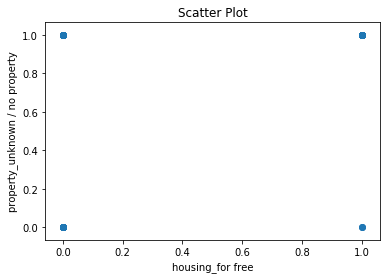

In [14]:
# housing_for free  corr with  property_unknown / no property  is:  0.7844230226614931
plt.scatter(X_train_d['housing_for free'], X_train_d['property_unknown / no property'])
plt.title('Scatter Plot')
plt.xlabel('housing_for free')
plt.ylabel('property_unknown / no property')
plt.show()

### Drop the original variables which are converted to dummy

<HTML>
    <BODY>
        <font color = "red">During dummification, the columns were automatically dropped. Therefore, this step is not required.</font>
    </BODY>
</HTML>

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [15]:
# Apply dummies and label encoding to data set
X_d = apply_d_l(X)

# As per the question before, 50% split was done
# Repeating the process for 70:30 split on original data (not on data from 50% split)
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.30, random_state=1)

X_train.shape

(700, 47)

In [16]:
X_train.head()
#y.head()

#X_train.info()

,account_check_status,duration_in_month,credit_amount,savings,present_emp_since,installment_as_income_perc,present_res_since,age,credits_this_bank,job,...,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
731,1,24,1987,0,2,2,4,21,1,1,...,0,1,0,0,0,1,1,0,0,1
716,0,30,3077,1,4,3,2,40,2,2,...,0,1,0,0,1,0,0,1,0,1
640,1,18,750,0,0,4,1,27,1,0,...,0,1,0,0,1,0,1,0,0,1
804,2,12,7472,1,0,1,2,24,1,0,...,0,1,0,0,0,1,1,0,0,1
737,1,18,4380,2,2,3,4,35,1,1,...,0,1,0,0,1,0,0,1,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=0)

In [19]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[200  14]
 [ 62  24]]


In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7466666666666667

### Q6 Show the list of the features importance( 1 Marks)

In [22]:
arrayOfImportance = rfc.feature_importances_

In [23]:
# Get feature importance
df_featureImportances = pd.DataFrame(arrayOfImportance)
df_featureImportances["ColumnLabel"] = X_test.columns
df_featureImportances.columns = ["Importance", "ColumnLabel"]

# Sort the importance in descending order
df_featureImportances = df_featureImportances.sort_values("Importance", ascending=False)
df_featureImportances

,Importance,ColumnLabel
2,0.109376,credit_amount
7,0.085226,age
1,0.082837,duration_in_month
0,0.080380,account_check_status
4,0.045974,present_emp_since
3,0.043850,savings
5,0.042659,installment_as_income_perc
6,0.036197,present_res_since
12,0.032513,credit_history_critical account/ other credits...
9,0.027132,job


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve
from scipy import interp
from sklearn.metrics import auc

In [25]:
# Use below values
num_folds = 10
seed = 77

In [26]:
#Validate the Random Forest model build above using k fold

In [27]:
# Function to apply k-mean score on input data
# It returns the accuracy array for all k-runs of the model
def kFoldRandomForest(X_all, y_all, k, random_state):
    kfold = KFold(n_splits=k, shuffle=True, random_state=random_state)
    accuracies = []
    confusionMatrix_agg = np.array([[0,0], [0,0]])
    #tprs = []
    #mean_fpr = np.linspace(0, 1, 100)
    fpr_all = []
    tpr_all = []
    counter = 0;
    for train, test in kfold.split(X_all):
        rfc.fit(X_all.iloc[train], y_all.iloc[train]).predict_proba(X_all.iloc[test])
        y_pred = rfc.predict(X_all.iloc[test])
        accuracy = accuracy_score(y_all.iloc[test], y_pred)
        matrix = confusion_matrix(y_all.iloc[test], y_pred)
        
        # For use in question 10
        fpr, tpr, t = roc_curve(y_all.iloc[test], y_pred)
        fpr_all.append(fpr)
        tpr_all.append(tpr)

        counter = counter + 1
        print("***Loop counter: ", counter)
        print("Accuracy: ", accuracy)
        print("Confusion matrix: \n", matrix)
        accuracies.append(accuracy)
        confusionMatrix_agg = np.add(confusionMatrix_agg, matrix)
        #confusionMatrix_agg.append(matrix)
    return accuracies, confusionMatrix_agg/k, fpr_all, tpr_all


kAccuracies, kConfusion_matrix, k_fpr, k_tpr = kFoldRandomForest(X_d, y, num_folds, seed)

***Loop counter:  1
Accuracy:  0.87
Confusion matrix: 
 [[70  1]
 [12 17]]
***Loop counter:  2
Accuracy:  0.79
Confusion matrix: 
 [[66  5]
 [16 13]]
***Loop counter:  3
Accuracy:  0.7
Confusion matrix: 
 [[68  4]
 [26  2]]
***Loop counter:  4
Accuracy:  0.81
Confusion matrix: 
 [[76  2]
 [17  5]]
***Loop counter:  5
Accuracy:  0.72
Confusion matrix: 
 [[62  5]
 [23 10]]
***Loop counter:  6
Accuracy:  0.72
Confusion matrix: 
 [[59  7]
 [21 13]]
***Loop counter:  7
Accuracy:  0.76
Confusion matrix: 
 [[61  6]
 [18 15]]
***Loop counter:  8
Accuracy:  0.74
Confusion matrix: 
 [[64  5]
 [21 10]]
***Loop counter:  9
Accuracy:  0.72
Confusion matrix: 
 [[63  6]
 [22  9]]
***Loop counter:  10
Accuracy:  0.78
Confusion matrix: 
 [[64  6]
 [16 14]]


In [28]:
#Calculate Mean score

In [29]:
print("For the given sample, the mean accuracy of the Random Forest model is: ", np.mean(kAccuracies))

For the given sample, the mean accuracy of the Random Forest model is:  0.7609999999999999


In [30]:
# Calculate score standard deviation using std()

In [31]:
print("For the given sample, the standard deviation of the accuracies is: ", np.std(kAccuracies))

For the given sample, the standard deviation of the accuracies is:  0.0496890329952194


# Q8 Print the confusion matrix( 1 Marks)

In [32]:
print(kConfusion_matrix)

[[65.3  4.7]
 [19.2 10.8]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [33]:
# True Positive Rate (TPR) 
# or Recall 
# or Sensitivity 
# or Probability of detection 
# or power
# = True positive / Condition positive(positive in fact) 
# = True positive / (True positive + False negative)
# = 1st row 1st column / 1st column
recall = kConfusion_matrix[0,0]/(kConfusion_matrix[0,0] + kConfusion_matrix[1,0])
print("Recall: ", recall)

Recall:  0.7727810650887573


In [34]:
# Precision
# = True positive / (True positive + False positive)
# = 1st row 1st column / 1st row
precision = kConfusion_matrix[0,0]/(kConfusion_matrix[0,0] + kConfusion_matrix[0,1])
print("Precision: ", precision)

Precision:  0.9328571428571428


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [35]:
#Hint: Use roc_curve
import matplotlib.pylab as pylab

<class 'list'>


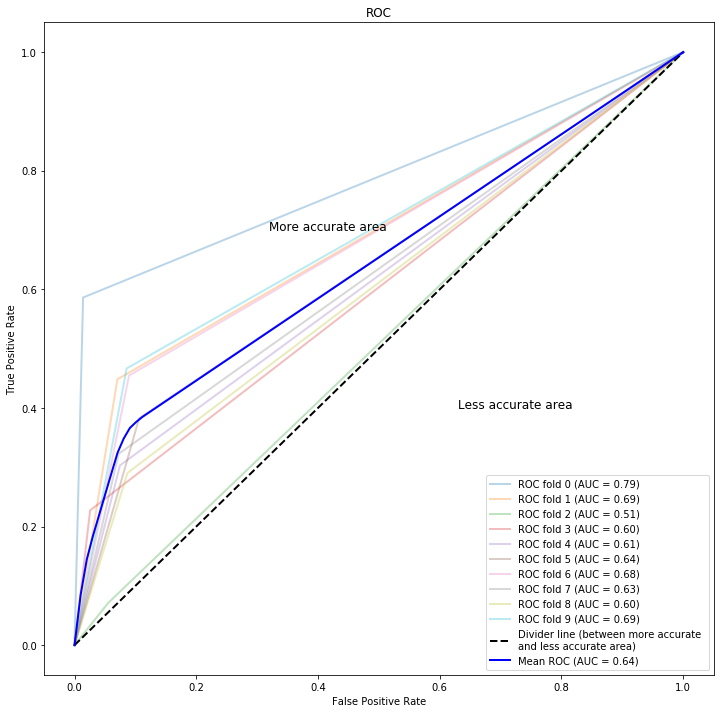

In [36]:
print(type(k_fpr))
# Using roc_curve, the k_fpr and k_tpr values were derived in question 7
# Process k_fpr and k_tpr to get the Receiver Operating Characteristic (ROC) curve
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

pylab.figure(figsize=[12, 12])

for i in range(len(k_fpr)):
    tprs.append(interp(mean_fpr, k_fpr[i], k_tpr[i]))
    roc_auc = auc(k_fpr[i], k_tpr[i])
    aucs.append(roc_auc)
    pylab.plot(k_fpr[i], k_tpr[i], lw=2, alpha = 0.3, label = "ROC fold %d (AUC = %0.2f)" % (i, roc_auc))
    i = i + 1

pylab.plot([0,1], [0,1], linestyle="--", label="Divider line (between more accurate \nand less accurate area)", 
           lw = 2, color = "black")

mean_tpr = np.mean(tprs, axis = 0)
mean_auc = auc(mean_fpr, mean_tpr)

pylab.plot(mean_fpr, mean_tpr, color = "blue", label = "Mean ROC (AUC = %0.2f)" %(mean_auc), lw = 2, alpha = 1)

pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC')
pylab.legend(loc = "lower right")
pylab.text(0.32, 0.7, "More accurate area", fontsize = 12)
pylab.text(0.63, 0.4, "Less accurate area", fontsize = 12)
pylab.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [37]:
print("Mean AUC for all the curves is: ", mean_auc)

Mean AUC for all the curves is:  0.6434961977382561


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
